# Исследование объявлений о продажах квартир

  
Исследование данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.   

**Цель исследования** 
Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

# План исследования:  
    1. Изучить данные, выявить аномалии, устранить пропуски, изменить типы данных.  
    2. Добавить новые столбцы, необходимые для исследования  
    3. Провести исследовательский анализ:  
        3.1 Выяснить как быстро продавались квартиры  
        3.2 Изучить факторы, влиящие на цену  
        3.3 Посчитать среднюю цену кв.метра  
        3.4 Выяснить, как стоимость обьекта зависит от расстояния от центра  
    4. Сделать выводы  

### Изучение информации о датасете ###

In [1]:
import pandas as pd
import numpy as np
import datetime as dt  
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод**  
Датафрейм содержит 22 столбца и 23699 строк. 
Данные содержат пропуски и аномальные значения.   
  
**Описание данных**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации   
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

### Предобработка данных

In [3]:
# выясняем, в каких строках есть пропущенные значения
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

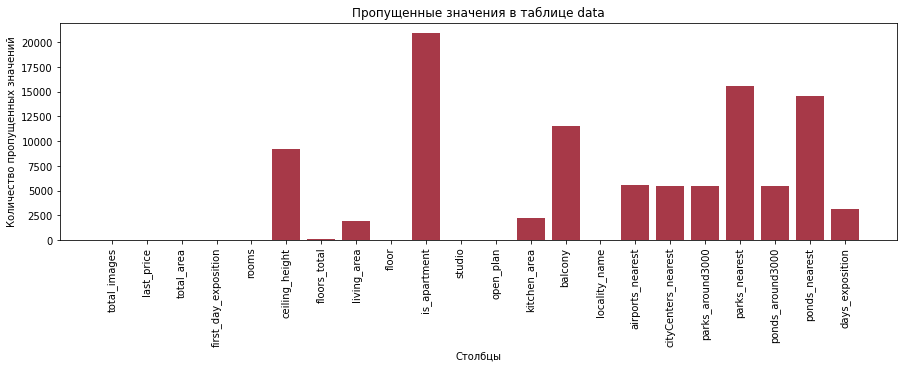

In [4]:
plt.figure(figsize=(15, 4))
plt.bar(data.columns, data.isnull().sum(),color='#A73948')

plt.xlabel('Столбцы')
plt.ylabel('Количество пропущенных значений')
plt.xticks(rotation=90)
plt.title('Пропущенные значения в таблице data')

plt.show()

#### Обрабока пропущенных значений ####




1. Удалим строки в пропущенными значениями в тех столбцах где их невозможно восстановить без искажения данных: floors_total, locality_name. Таких данных в указанных столбцах 1-2%, потеря этих данных не повлияет на результат. 
2. Заполним пропущенные данные о наличии балкона нулями и изменим тип данных на int.
3. Заполним пропущенные значения в столбце is_apartment значением False.
4. Заменим пропущенные строки столбцов ceiling_height и  kitchen_area медианным значением.
5. Пропущенные значения столбцов parks_around3000 и  ponds_around3000 заполним нулями.
6. Добавим столбец first_day_exposition. Изменим типы и форматы данных столбцов last_price,days_exposition.

In [5]:
data = data.dropna(subset=['locality_name','floors_total'])

data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

data['is_apartment'] = data['is_apartment'].fillna(False)

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)
data['parks_around3000'] = data['parks_around3000'].fillna(0.0)


data['last_price'] = data['last_price'].astype('int')

In [6]:
# проверка данных после изменения значений
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]
data[data['total_area']*0.9 <= (data['living_area'] + data['balcony'])]
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
144,1,2450000,27.0,2017-03-30T00:00:00,0,2.65,24.0,15.5,2,False,...,9.1,2,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
171,6,3800000,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,13,8500000,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.0,2,False,...,15.3,0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN
23579,7,2350000,24.8,2018-06-07T00:00:00,1,2.65,10.0,18.0,2,False,...,9.1,0,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,89.0
23592,10,1450000,29.0,2017-11-11T00:00:00,0,2.65,9.0,18.0,8,False,...,9.1,2,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,82.0
23637,8,2350000,26.0,2018-06-26T00:00:00,0,2.65,25.0,17.0,4,False,...,9.1,2,посёлок Бугры,NaN,NaN,0.0,NaN,0.0,NaN,207.0


In [7]:
#переведем столбец с датой в формат даты без времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],\
                                              format = '%Y-%m-%d')

data['days_exposition'] = data['days_exposition'].fillna((pd.to_datetime\
                    ('today') - data['first_day_exposition']).dt\
                                                 .round('D').dt.days)


**Предобработка в столбцах с информацией о населенных пунктах** 
1. Посмотрим число пропущенных значений по населенным пунктам.
2. Заменим пропущенные значения столбцов с расстоянием от дома до парка, аэропорта, центра города, пруда средними значениями, там где это возможно.
3. Изучим данные столбца locality_name, уберем неявные дубликаты, унифицируем названия населенных пунктов, поменяем ё на е.

In [8]:
t_data = data
t_data['cityCenters_nearest'] = t_data['cityCenters_nearest'].fillna(0)
city_dict = {}
for row in t_data.to_dict('records'):
    city_dict [row['locality_name']]=0
for row in t_data.to_dict('records'):
    if row['cityCenters_nearest']== 0:
        city_dict [row['locality_name']]+=1
local_center_table = pd.DataFrame.from_dict(city_dict ,\
                                            orient='index',\
                                            columns = ['count_nan'])
local_center_table=local_center_table.sort_values(by ='count_nan',\
                                                  ascending=False)
local_center_table.head(20)

,count_nan
посёлок Мурино,520
Всеволожск,398
Гатчина,307
деревня Кудрово,299
Выборг,237
Кудрово,171
деревня Новое Девяткино,143
Сертолово,142
Кириши,125
Сланцы,112


In [9]:
#заменим пропущенные значения столбцов с расстоянием от дома до парка, аэропорта, центра города, пруда средними значениями, там где это возможно.

for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d)&(data['cityCenters_nearest'].isna()),\
                                           'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == d), 'cityCenters_nearest'].mean()
    data.loc[(data['locality_name'] == d)&(data['airports_nearest'].isna()),\
                                           'airports_nearest'] = \
    data.loc[(data['locality_name'] == d), 'airports_nearest'].mean()
    data.loc[(data['locality_name'] == d)&(data['parks_nearest'].isna()),\
                                           'parks_nearest'] = \
    data.loc[(data['locality_name'] == d), 'parks_nearest'].mean()
    data.loc[(data['locality_name'] == d)&(data['ponds_nearest'].isna()),\
                                           'ponds_nearest'] = \
    data.loc[(data['locality_name'] == d), 'ponds_nearest'].mean()



In [10]:
# изучим данные столбца locality_name, уберем неявные дубликаты,
# унифицируем названия населенных пунктов, поменяем ё на е.
# получаем список всех значений столбца
data['locality_name'].value_counts().sort_index()

data['locality_name'] = data['locality_name'].str\
                                    .replace('ё', 'е')
data['locality_name'] = data['locality_name'].str\
                        .replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str\
                        .replace('поселок при железнодорожной станции',\
                                 'поселок станции')
data['locality_name'] = data['locality_name'].str\
                        .replace('садоводческое некоммерческое товарищество',\
                                 'СНТ')
data['locality_name'] = data['locality_name'].str\
                        .replace('садовое товарищество','СНТ')
data['locality_name'] = data['locality_name'].str\
                        .replace('поселок Мурино','Мурино')
# неявные дубликаты устранены

In [11]:
data.locality_name.nunique()

320

In [12]:
data.drop_duplicates(['total_area','floor','floors_total','cityCenters_nearest',\
                     'locality_name','rooms'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,1778.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.000000,2494.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,0.0,0.0,NaN,0.0,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,9.10,0,село Рождествено,NaN,0.0,0.0,NaN,0.0,NaN,2167.0
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.000000,602.0


#### Обрабока аномалий ####

Изучим данные и обработаем аномальные значения столбцов: total_area, living_area, ceiling_height,floors_total.

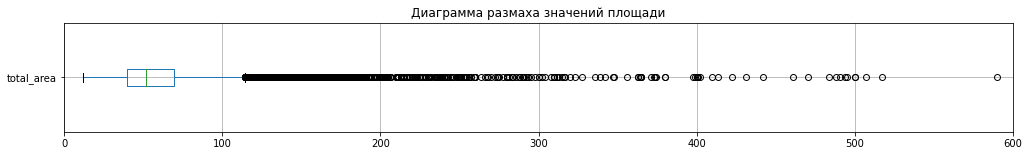

In [13]:
# аномалии столбца total_area
data['total_area'].describe()
# видим, что максимальная площать 631 м².
# построим график, чтобы определить, есть ли выбросы

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 600);
#по графику видно, что есть аномалии. 
data[data['total_area'] > 500].sort_values('total_area').tail(10);


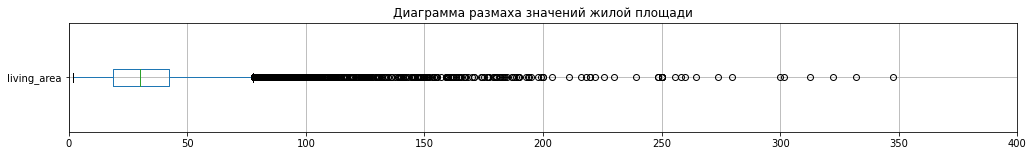

In [14]:
# аномалии столбца living_area
data['living_area'].describe()
# видим, что максимальная площать 312 м²
# при этом среднее значение не сиьно отличается от медианы
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 400);

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.000000,2.0,289.0,13.0
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,5.20,0,поселок городского типа Мга,NaN,0.0,0.0,NaN,0.0,NaN,248.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,498.338298,3.0,80.0,71.0


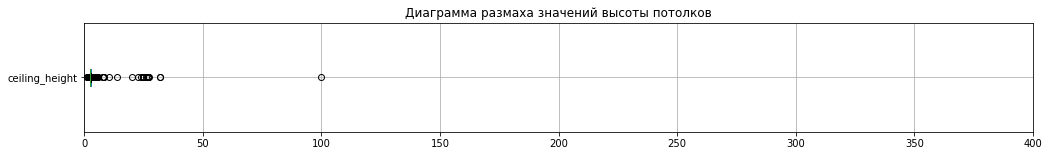

In [15]:
# изучим столбец ceiling_height на предмет аномальных значений
data['ceiling_height'].describe()

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений высоты потолков')
ax.set_xlim(0, 400);

# отфильтруем таблицу по столбцу ceiling_height
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)
data[data['ceiling_height'] < 2].sort_values('ceiling_height').tail(10)
# получаем 28 аномальных значений. 
# они могли возникнуть из-за некоректного преобразования чисел float в int 

Квартиры с высотой потолков 32,27,17 или ниже 2 метров можно считать аномалиями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,520.391129,45.0
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.000000,166.0


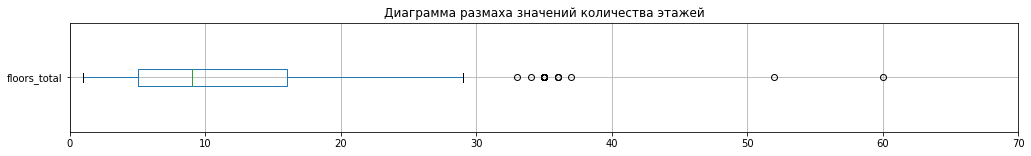

In [16]:
# аномалии столбца floors_total
data['floors_total'].describe()
data['floors_total'].astype(np.int64)

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества этажей')
ax.set_xlim(0, 70);
# фильтруем таблицу, проверим, в каком городе находятся эти здания. 
data[data['floors_total'] > 40].sort_values('floors_total').tail(10)



Здания выше 40 этажей можно считать редкостями. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18867,1,470000,41.0,2018-02-11,1,2.65,5.0,32.0,3,False,...,9.0,0,деревня Выскатка,NaN,0.0,0.0,NaN,0.0,NaN,46.0
23484,11,470000,44.5,2018-07-02,2,2.65,2.0,28.0,2,False,...,7.5,0,Сланцы,NaN,0.0,0.0,NaN,0.0,NaN,298.0
21912,0,470000,37.0,2018-02-18,1,2.65,3.0,NaN,3,False,...,9.1,0,поселок Совхозный,NaN,0.0,0.0,NaN,0.0,NaN,45.0
16032,8,480000,32.0,2019-01-06,1,2.65,2.0,16.0,1,False,...,9.1,0,Сланцы,NaN,0.0,0.0,NaN,0.0,NaN,83.0
10782,3,490000,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,...,5.5,0,Сланцы,NaN,0.0,0.0,NaN,0.0,NaN,719.0
6859,6,490000,40.0,2017-12-11,1,2.65,5.0,NaN,3,False,...,9.1,0,деревня Старополье,NaN,0.0,0.0,NaN,0.0,NaN,43.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.000000,3.0,285.0,233.0
14706,15,401300000,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.000000,1.0,478.0,393.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,498.338298,2.0,318.0,106.0
12971,19,763000000,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,...,9.1,2,Санкт-Петербург,25108.0,3956.0,1.0,530.000000,3.0,756.0,33.0


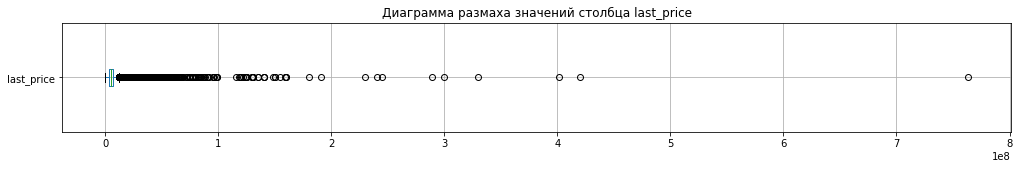

In [17]:
# аномалии столбца last_price
# строим график
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений столбца last_price')
ax.set_xlim();
#есть аномалии,смотрим, нужно ли удалять данные
data[(data['last_price'] > 300000000)|(data['last_price'] < 500000)]\
                                .sort_values('last_price').tail(10)

# данные оставляем

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [19]:
# проверим какие аномалии остались

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition',\
          'last_price', 'living_area',  'kitchen_area',\
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","21,700.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"3,339.00","763,000,000.00",409.70,112.00,33.00,60.00


#### Работа с редкими значениями столбцов

Найдем редкие значения столбцов: rooms, total_area, days_exposition, last_price, living_area, kitchen_area, floors_total.

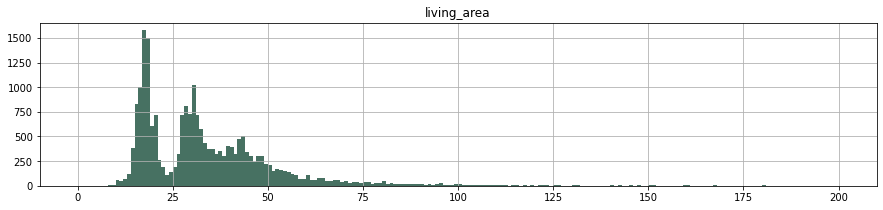

In [20]:

data.hist(column = 'living_area', bins = 200, figsize = (15,3),\
                                              range = (0,200),color = '#477162');

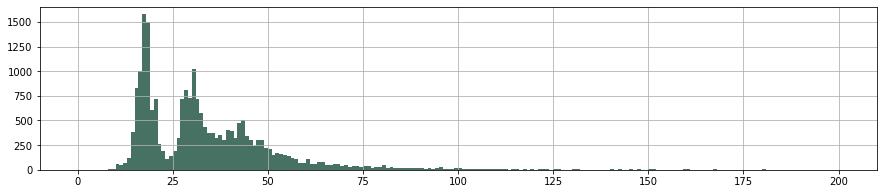

In [21]:

data.living_area.hist(bins = 200, figsize = (15,3), range = (0,200),color = '#477162');

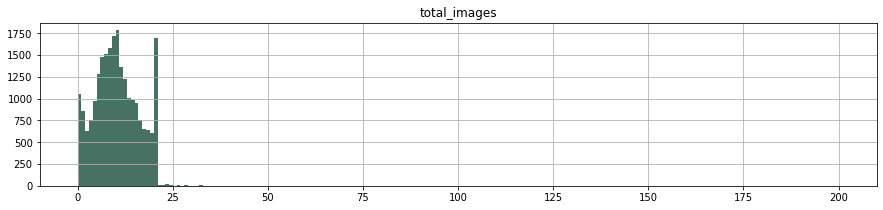

In [22]:

data.hist(column = 'total_images', bins = 200, figsize = (15,3),\
                                                range = (0,200),color = '#477162');


**Считаем редкостями и удаляем из датафрейма:** 
          
  - Все квартиры площадью больше 250 м2 и меньше 10 м2;    
  - Квартиры с более чем 10 комнатами;  
  - Квартиры дороже 50 млн. руб и дешевле 1 млн.руб;  
  - Высоту потолка меньше 2,5;    
  - Высоту здания больше 40 этажей.  

In [23]:
#убираем редкости
data= data[(data['total_area'] <= 250) & (data['total_area'] > 10)]
data= data[data['rooms'] < 10]
data= data[(data['last_price']<50000000) & (data['last_price']>1000000)]
data= data[(data['ceiling_height'] >= 2.5) | (data['ceiling_height'].isna())]
data= data[data['rooms'] < 10]
data= data[(data['floors_total']<40)| (data['floors_total'].isna())]

In [24]:
# Значения параметров объектов недвижимости на разных квантилях
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.50,3.00,"1,076,564.00",10.00,4.00,1.00,2.00
0.01,1.00,25.31,2.50,4.00,"1,300,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,123.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,168.11,3.59,"2,383.00","26,659,760.00",102.00,31.86,23.00,26.00
0.9988,7.00,231.07,8.00,"3,268.15","43,000,000.00",155.25,49.61,26.00,33.34


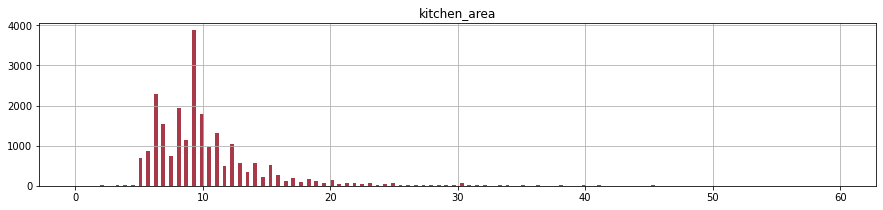

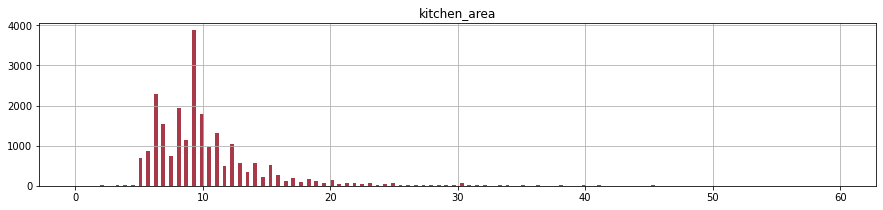

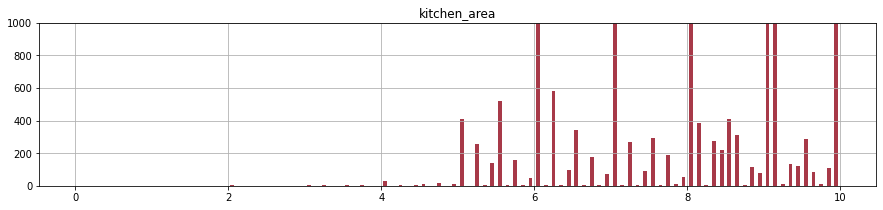

In [25]:
#data['kitchen_area'] = data[data['kitchen_area'].notnull()]['kitchen_area'].astype('int')
data.hist(column = 'kitchen_area', bins = 100, figsize = (15,3),rwidth = 0.5, range = (0,60),color = '#A73948')
data.hist(column = 'kitchen_area', bins = 100, figsize = (15,3),rwidth = 0.5, range = (0,60),color = '#A73948')
data.hist(column = 'kitchen_area', bins = 100, figsize = (15,3),rwidth = 0.5, range = (0,10),color = '#A73948')
plt.ylim(0, 1000);

data= data[(data['kitchen_area']<=50) & (data['kitchen_area']>=4)]


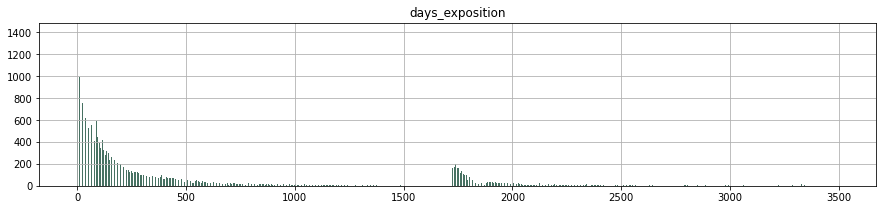

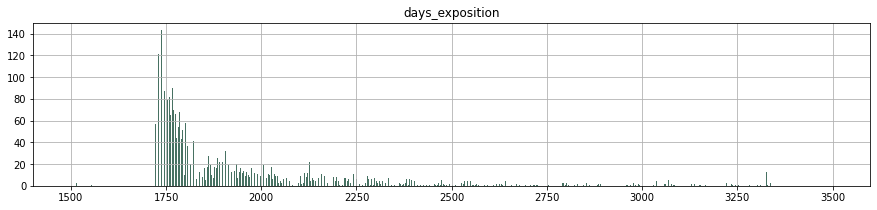

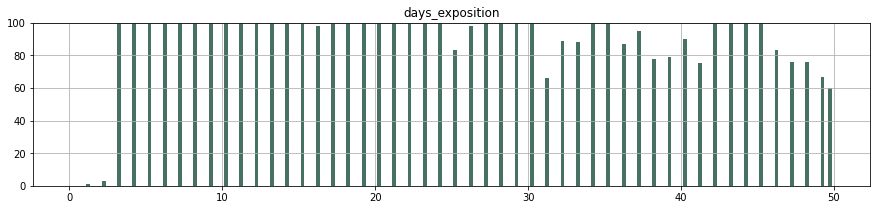

In [26]:
data['days_exposition'] = data['days_exposition'].apply(pd.to_numeric)

data.hist(column = 'days_exposition', bins = 500, figsize = (15,3),rwidth = 0.5, range = (0,3500),color = '#477162');
data.hist(column = 'days_exposition', bins = 500, figsize = (15,3),rwidth = 0.5, range = (1500,3500),color = '#477162')
data.hist(column = 'days_exposition', bins = 100, figsize = (15,3),rwidth = 0.5, range = (0,50),color = '#477162')

plt.ylim(0, 100);
data=data[(data['days_exposition']>2)&(data['days_exposition']<3200)]

In [27]:
# оцениваем сколько  осталось пропусков после обработки
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22956 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22956 non-null  int64         
 1   last_price            22956 non-null  int64         
 2   total_area            22956 non-null  float64       
 3   first_day_exposition  22956 non-null  datetime64[ns]
 4   rooms                 22956 non-null  int64         
 5   ceiling_height        22956 non-null  float64       
 6   floors_total          22956 non-null  float64       
 7   living_area           21172 non-null  float64       
 8   floor                 22956 non-null  int64         
 9   is_apartment          22956 non-null  bool          
 10  studio                22956 non-null  bool          
 11  open_plan             22956 non-null  bool          
 12  kitchen_area          22956 non-null  float64       
 13  balcony         

#### Результаты предобработки ####  

1. Удалили строки, значения которых невозможно установить без искажения результатов стоблцов floors_total, locality_name;  
2. Произвели замены неявных дубликатов столбца locality_name;
3. Изменили формат в строках с датами;
4. Заполнили отсутствующие значения в строках, где это можно было сделать без искажения данных;
5. Обработали аномалии столбцов total_area, living_area, ceiling_height, floors_total.Удалили данные, там где это необходимо для корректного исследования;  
7. Оставили пропускив столбце day_exposition,возможно, квартира еще не продана;
6. Оставили без изменения столбцы с даными о расстоянии до парка, аэропорта, пруда, центра. Так как невозможно корректно восстановить эти данные.  

Всего в таблице до обработки было 23699 строк. После обработки стало 22758. Потеря данных = 4%



### Добавление новых столбцов ###

Добавим в таблицу новые столбцы со следующими параметрами:

**square_meter_price** - цена одного квадратного метра;  
**day of publication** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
**month_of_publication** - месяц публикациmи объявления;  
**year_of_publication** - год публикации объявления;  
**floor_category** - тип этажа квартиры (значения — «первый», «последний», «другой»);  
**cityCenters_nearest_km** - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений). 

In [28]:
data['total_area'] = data['total_area'].astype(np.float64)
data['last_price'] = data['last_price'].astype(np.float64)
data['living_area'] = data['living_area'].astype(np.float64)
data['rooms'] = data['rooms'].astype(np.float64)
data['living_area'] = data['living_area'].astype(np.float64)
data['kitchen_area'] = data['kitchen_area'].astype(np.float64)
data['floors_total'] = data['floors_total'].astype(np.float64);


In [29]:
data['square_meter_price'] = data['last_price'] / data['total_area'];


In [30]:
# добавим столбец с информацией о днях недели публикации объявления
data['day_of_publication'] = data['first_day_exposition'].dt.weekday

# добавим столбец с информацией о месяце публикации
data['month_of_publication'] = data['first_day_exposition'].dt.month

# добавим столбец с информацией о годе публикации
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [31]:
# добавим столбец, фильтрующий данные о этаже 
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'


In [32]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [33]:
# добавим столбец с информацией о расстоянии до центра города в километрах 
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000)
data['cityCenters_nearest_km']  = data['cityCenters_nearest_km'].round()

### Исследовательский анализ данных

Далее изучим данные с помощью describe и построим диаграммы для столбцов с информацией о недвижимости, обьявлении о продаже и расстоянии от обьекта недвижимости до центра города, парков, аэропорта.  


count    22956.0
mean         2.7
std          1.0
min          2.5
25%          2.6
50%          2.6
75%          2.7
max        100.0
Name: ceiling_height, dtype: float64

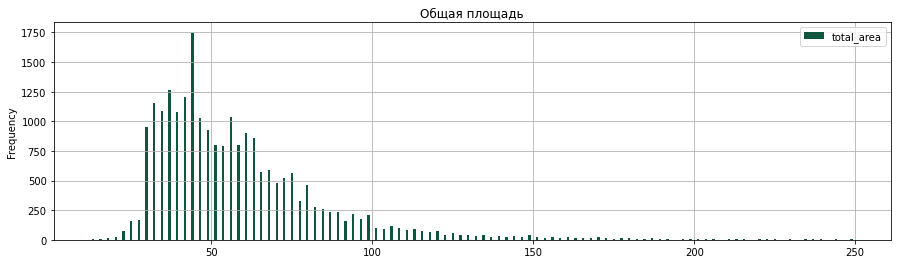

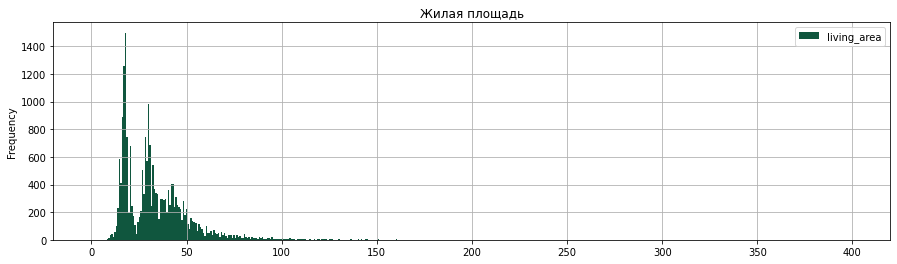

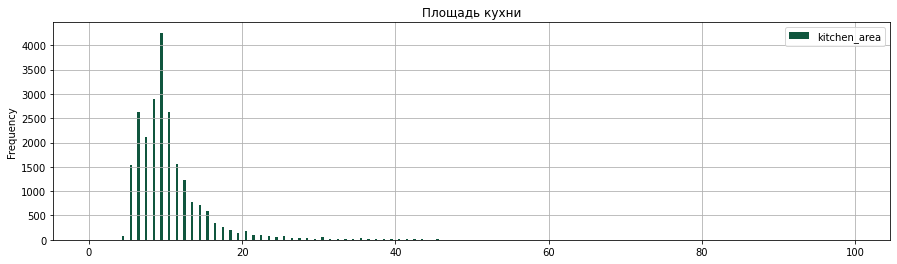

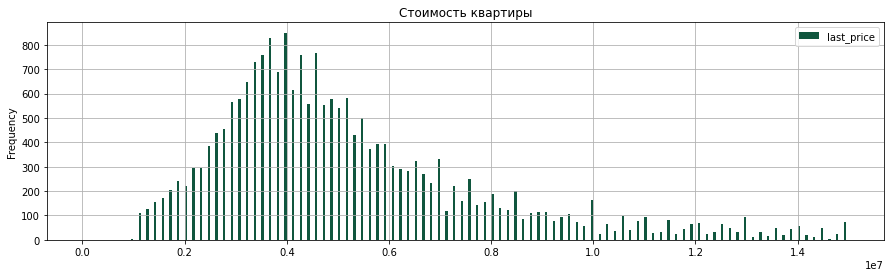

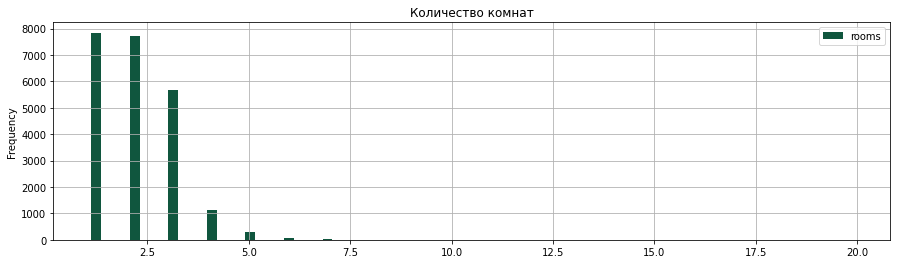

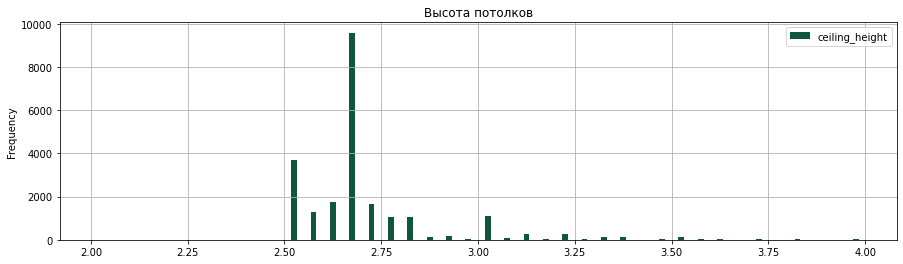

In [34]:
# общая площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100,color = '#10563E', grid=True, figsize = (15,4),rwidth = 0.3,
          title = 'Общая площадь')

# жилая площадь
data.plot(y = 'living_area', kind = 'hist', bins = 500,color = '#10563E', grid=True, figsize = (15,4),
         range = (0,400),rwidth = 1, title = 'Жилая площадь')
data['living_area'].describe()


# площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100,color = '#10563E', grid=True, figsize = (15,4)\
          ,rwidth = 0.3, range = (0,100),title = 'Площадь кухни')
data['kitchen_area'].describe()


# цена квартиры
data.plot(y = 'last_price', kind = 'hist', bins = 100,color = '#10563E', grid=True, figsize = (15,4),\
          range = (0,15000000),title = 'Стоимость квартиры',rwidth = 0.3)
data['last_price'].describe()


# количетство комнат
data['rooms'].max()
data.plot(y = 'rooms', kind = 'hist', bins = 40,color = '#10563E', grid=True, figsize = (15,4), range = (1,20),\
          title = 'Количество комнат',rwidth = 0.5)
data['rooms'].describe().round(1)


# высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 40,color = '#10563E', grid=True,rwidth = 0.3, figsize = (15,4),\
          range = (2,4),title = 'Высота потолков')
data['ceiling_height'].describe().round(1)



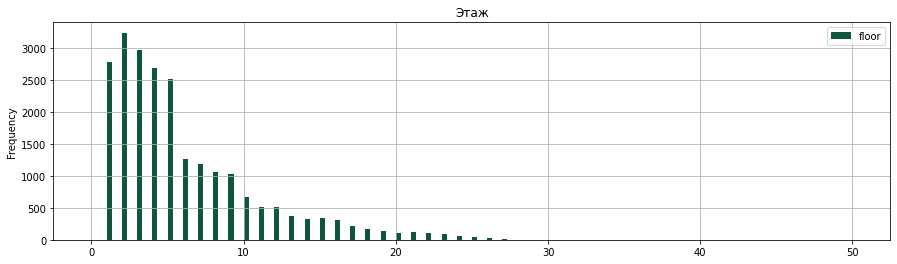

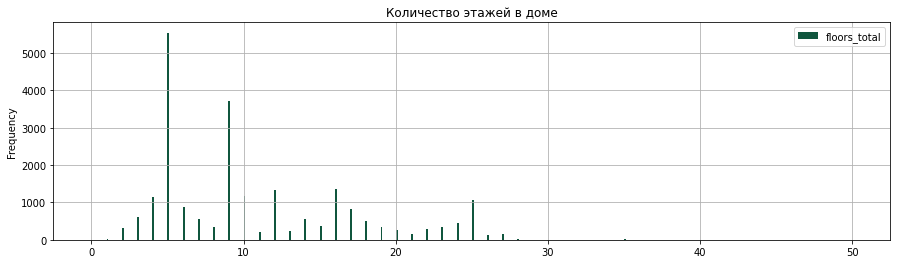

count    22956.0
mean        10.8
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         36.0
Name: floors_total, dtype: float64

In [35]:
# на каком этаже находится квартира
#data['floor'] = data['floor'].astype('int')

data.plot(y = 'floor', kind = 'hist', bins = 150,\
          grid=True,color = '#10563E', figsize = (15,4),\
          range = (0,50),title = 'Этаж')
data['floor'].describe().round(1)

# общее количество этажей в доме

data.plot(y ='floors_total',\
          kind = 'hist',\
          bins = 400, 
          grid=True,\
          color = '#10563E',\
          figsize = (15,4),
          range = (0,50),\
          title = 'Количество этажей в доме')

plt.show()
data['floors_total'].describe().round(1)


count      22956
unique         3
top       другой
freq       17000
Name: floor_category, dtype: object

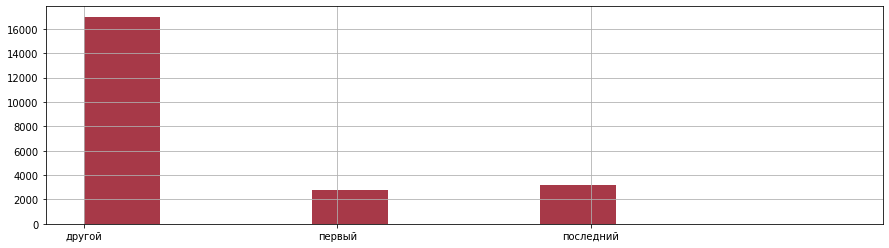

In [36]:
# категория этажа
data['floor_category'] = data['floor_category'].convert_dtypes()
data['floor_category'].hist(bins = 10,figsize = (15,4), range = (0,3),color = '#A73948',)
data['floor_category'].describe()
# меньше всего квартир продается на 1 и последних этажах

count    17259.0
mean       492.8
std        231.3
min          1.0
25%        448.5
50%        498.3
75%        498.3
max       3190.0
Name: parks_nearest, dtype: float64

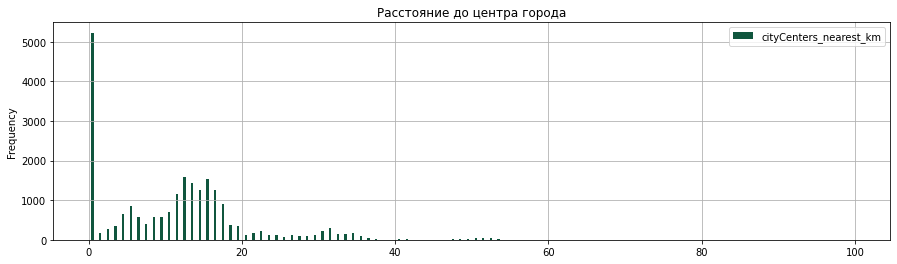

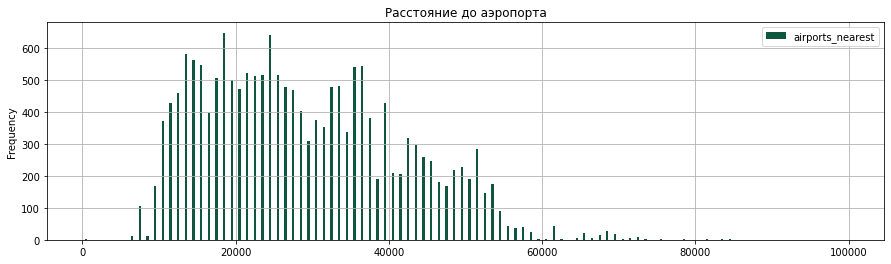

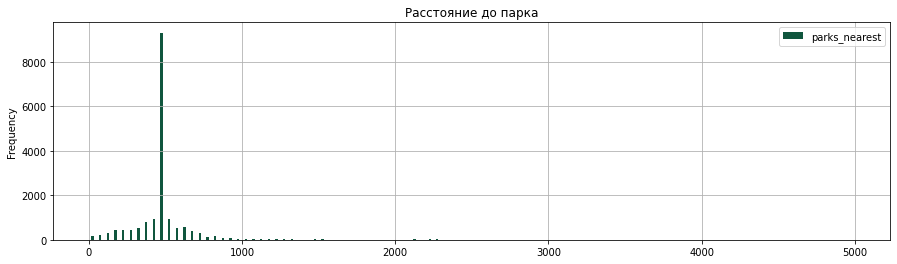

In [37]:
# расстояние до центра

data.plot(y = 'cityCenters_nearest_km', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,100),\
          title = 'Расстояние до центра города',rwidth = 0.3,color = '#10563E')
data['cityCenters_nearest_km'].describe().round(1)

# расстояние до аэропорта

data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,100000),\
         title = 'Расстояние до аэропорта',rwidth = 0.3,color = '#10563E')
data['airports_nearest'].describe().round(1)

# расстояние до парка

data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,5000),\
          title = 'Расстояние до парка',rwidth = 0.3,color = '#10563E')
data['parks_nearest'].describe().round(1)


count    22956.000000
mean         2.564558
std          1.787677
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_publication, dtype: float64

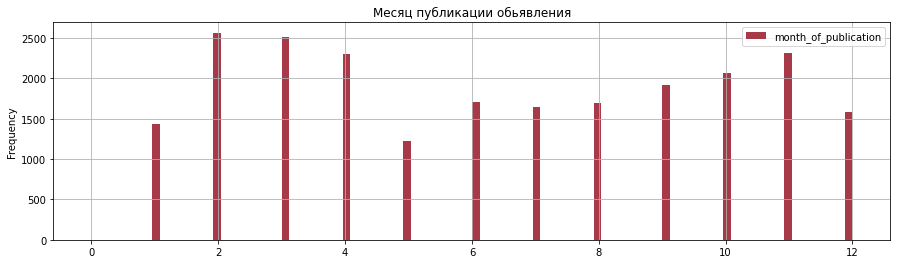

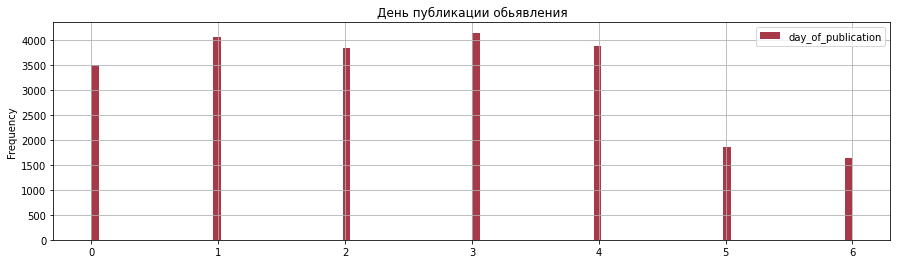

In [38]:
# дата публикации объявлений
data.plot(y ='month_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (15,4),\
          range = (0,12), title = 'Месяц публикации обьявления',color = '#A73948')
data['month_of_publication'].describe()

# день публикации объявлений
data.plot(y ='day_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (15,4),\
          range = (0,6), title = 'День публикации обьявления',color = '#A73948')
data['day_of_publication'].describe()


**Выводы:**  

**1.** Средняя площадь продаваемых квартир = 60 м², а медиана = 52 м². Средняя стоимость квартиры равна 6,5 млн руб., медиана 4,6 млн руб.   
**2.** Больше всего высталено на продажу двухкомнатных квартир.    
**3.** Среднее значение высоты потолков - 2,77 м, медиана 2,65 м. В данных есть аномальные значение, но их число незначительно.      
**4.** Меньше всего квартир продается на первых и последних этажах.      
**5.** Медианное расстояние от дома до аэропорта составляет 26 км. От дома до парка - 452 метра, до центра города 13 км.      
**6.** Большая часть обьявлений публикуется в рабочие дни.  
**7** Летом цена квартир ниже.  


### Как быстро продавались квартиры  ###  



In [39]:
data['days_exposition'].max()

3193.0

count    22956.0
mean       409.0
std        630.0
min          3.0
25%         45.0
50%        122.0
75%        385.0
max       3193.0
Name: days_exposition, dtype: float64

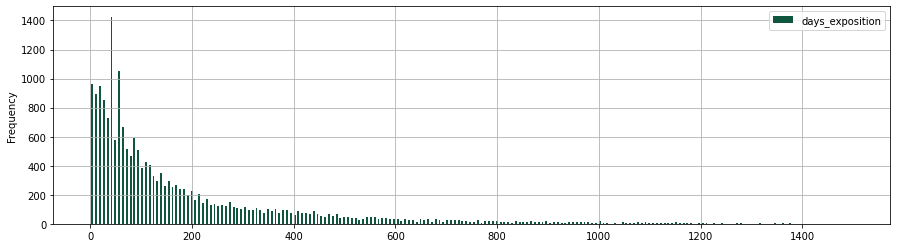

In [40]:
# построим гистограмму
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True,\
          range = (1,1500),figsize = (15,4),rwidth = 0.5, color = '#10563E')
# изучим данные столбца
data['days_exposition'].describe().round()
                     

In [41]:
data['days_exposition'].quantile()

122.0

**Вывод**  
Максимально квартира продавалась 3057 дней, минимально 3 дня. Среднее значение 372 дней.   
Быстрыми можно считать продажи до 4 месяцев
Долгими - продажи от полугода до года


### Факторы, больше всего влияющие на стоимость квартиры ###


#### Зависимость цены квартиры от общей площади ####

0.8

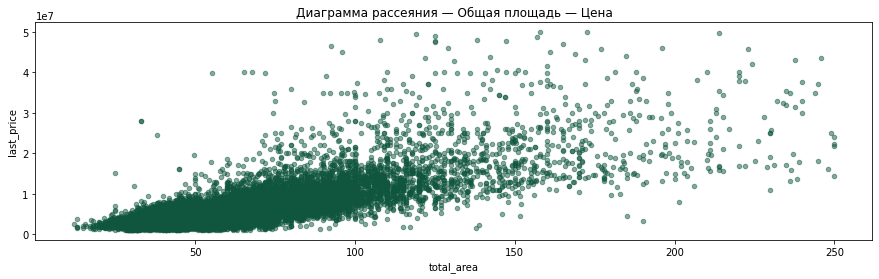

In [42]:
# print(data.head())
# Изучим зависимость цены и площади квартиры. 
data.plot(kind='scatter',y='last_price',
          x='total_area', alpha=0.5, 
          subplots=True, figsize=(15,4),
          c = '#10563E', s = 20)
plt.title('Диаграмма рассеяния — Общая площадь — Цена')
data['total_area'].corr(data['last_price']).round(1)

Кореляция высокая. Чем больше общая площадь, тем выше стоимость.

#### Зависимость цены квартиры от жилой площади ####

0.7

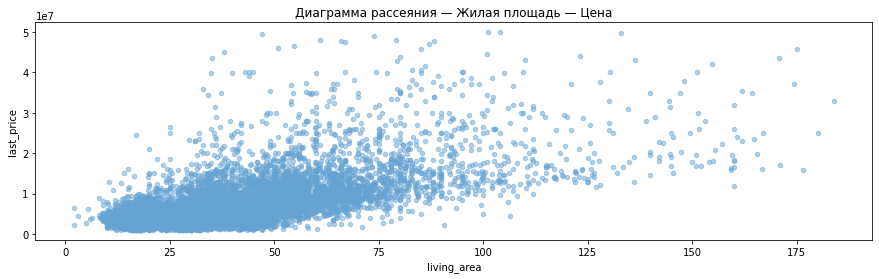

In [43]:
data.plot(kind='scatter',y='last_price',
          x='living_area', alpha=0.5, 
          subplots=True, figsize=(15,4),
          c = '#65A3D3', s = 20)
plt.title('Диаграмма рассеяния — Жилая площадь — Цена')

data['living_area'].corr(data['last_price']).round(1)


Корреляция средняя. Увеличение общей стоимости с увеличением жилой площади.

#### Зависимость цены квартиры от площади кухни ####

In [44]:
# вычислим корреляцию данных
data['kitchen_area'].corr(data['last_price']).round(1)


0.6

Кореляция слабая. Небольшая зависимость стоимости квартиры от метража кухни


#### Зависимость цены квартиры от количества комнат ####

0.49

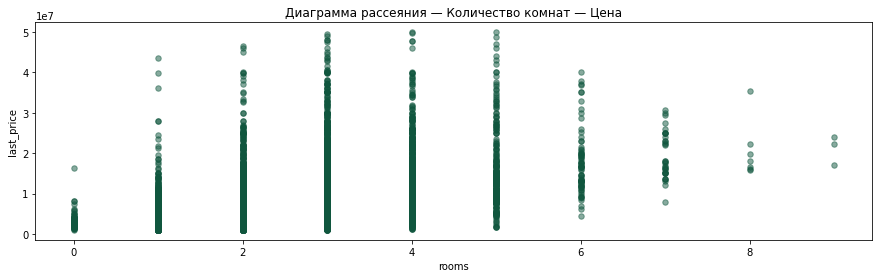

In [45]:
data.plot(kind='scatter',y='last_price',
          x='rooms', alpha=0.5, 
          subplots=True, figsize=(15,4),
          c = '#10563E', s = 30)
plt.title('Диаграмма рассеяния — Количество комнат — Цена')
# вычислим корреляцию
data['rooms'].corr(data['last_price']).round(2)


Корреляция слабая. Стоимость квартиры немного увеличивается в зависимости от числа комнат. Но это не основной фактор, влияющий на цену


#### Зависимость цены квартиры от типа этажа ####

,mean,count,median
floor_category,,,
другой,6.176069e+06,17000,4800000.0
первый,4.692554e+06,2789,3950000.0
последний,5.841137e+06,3167,4350000.0


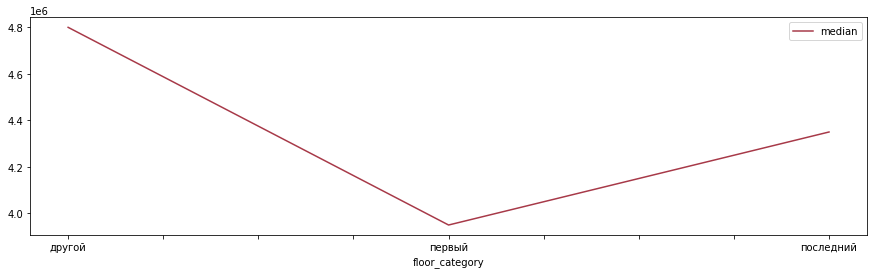

In [46]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', 
                                              values = 'last_price',
                                              aggfunc = ['mean', 'count', 'median']
                                              )
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median',figsize=(15,4),color = '#A73948')
pivot_table_floor_category



**Вывод**
Квартиры на первом этаже дешевле квартир на последнем этаже. Но квартиры на других этажах дороже на 13%, чем квартиры на первом и последнем этажах.

#### Зависимость цены квартиры от даты размещения (день недели, месяц, год) ####

##### Зависимость цены квартиры  от дня недели #####

,mean,count,median
day_of_publication,,,
1,5.942349e+06,4073,4730000.0
2,6.044439e+06,3842,4700000.0
0,5.988886e+06,3505,4650000.0
3,6.115885e+06,4156,4650000.0
5,5.742027e+06,1855,4600000.0
4,5.808926e+06,3889,4580000.0
6,5.808455e+06,1636,4550000.0


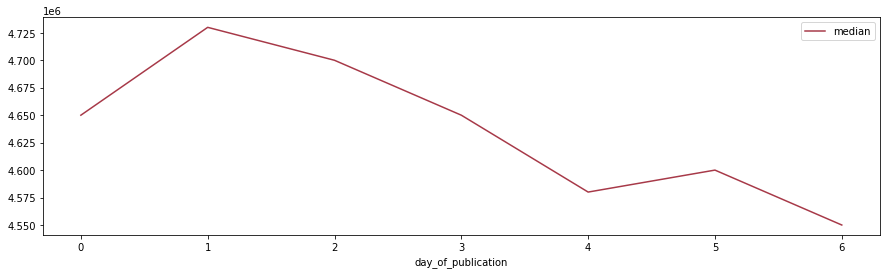

In [47]:
pivot_table_day_of_publication = data.pivot_table(index ='day_of_publication', values ='last_price',\
                                                  aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_publication.columns = ['mean', 'count', 'median']
pivot_table_day_of_publication.plot(y = 'median',figsize=(15 ,4),color = '#A73948')
pivot_table_day_of_publication.sort_values('median', ascending = False)

По графику видим: цена квадратного метра выше в обьявлениях, выставленных со вторника по среду. К пятнице снижается число опубликованных обьявлений. Скорее всего это связано с рабочим графиком, так как в будни публикуется большая часть обьявлений.

##### Зависимость цены квартиры  от месяца #####

,mean,count,median
month_of_publication,,,
4,5.967904e+06,2300,4800000.0
9,6.033528e+06,1919,4700000.0
11,6.140900e+06,2313,4700000.0
12,5.942110e+06,1580,4665000.0
2,5.966058e+06,2564,4650000.0
3,5.819911e+06,2510,4650000.0
7,5.931937e+06,1641,4650000.0
1,5.985412e+06,1437,4600000.0
8,5.978400e+06,1698,4600000.0


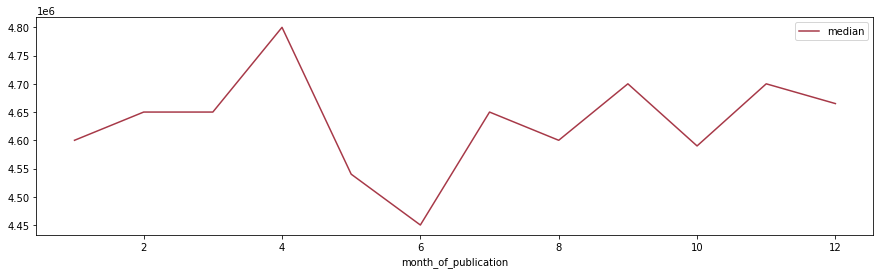

In [48]:
pivot_table_month_of_publication = data.pivot_table(index = 'month_of_publication',
                                                    values = 'last_price',
                                                    aggfunc = ['mean', 'count', 'median'])
pivot_table_month_of_publication.columns = ['mean', 'count', 'median']
pivot_table_month_of_publication.plot(y = 'median',figsize=(15, 4),color = '#A73948')

pivot_table_month_of_publication.sort_values('median', ascending = False)


Самая высокая стоимость в апреле, самая низкая стоимость в июне.  
Это связано с сезонностью. Летом, в сезон отпусков, спрос меньше - поэтому цены ниже. 

##### Зависимость  цены квартиры от года #####

,mean,count,median
year_of_publication,,,
2014,9.485846e+06,114,6775000.0
2015,6.851713e+06,1109,5230000.0
2019,6.277959e+06,2799,5100000.0
2018,5.720649e+06,8281,4600000.0
2016,6.067744e+06,2678,4550000.0
2017,5.856493e+06,7975,4500000.0


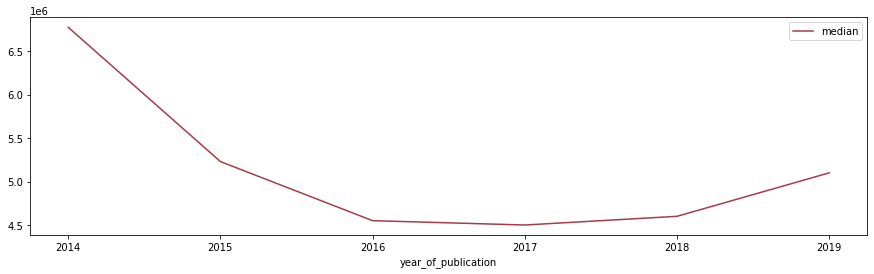

In [49]:
pivot_table_year_of_publication = data.pivot_table(index = 'year_of_publication', 
                                                   values = 'last_price',
                                                   aggfunc = ['mean', 'count', 'median'])
pivot_table_year_of_publication.columns = ['mean', 'count', 'median']
pivot_table_year_of_publication.plot(y = 'median',figsize=(15, 4),color = '#A73948')
pivot_table_year_of_publication.sort_values('median', ascending = False)


In [50]:
data.pivot_table(index = 'year_of_publication', values='day_of_publication', aggfunc = ['mean', 'count', 'median'])



,mean,count,median
,day_of_publication,day_of_publication,day_of_publication
year_of_publication,,,
2014,2.236842,114,2
2015,2.452660,1109,2
2016,2.523152,2678,2
2017,2.632351,7975,3
2018,2.575051,8281,3
2019,2.437656,2799,2


In [51]:
data.pivot_table(index = 'year_of_publication',
                 values = 'total_area',
                 aggfunc = ['mean', 'count', 'median'])


,mean,count,median
,total_area,total_area,total_area
year_of_publication,,,
2014,78.430351,114,74.75
2015,66.817854,1109,59.20
2016,60.443234,2678,53.00
2017,58.644168,7975,51.70
2018,56.896772,8281,50.70
2019,57.706213,2799,52.00


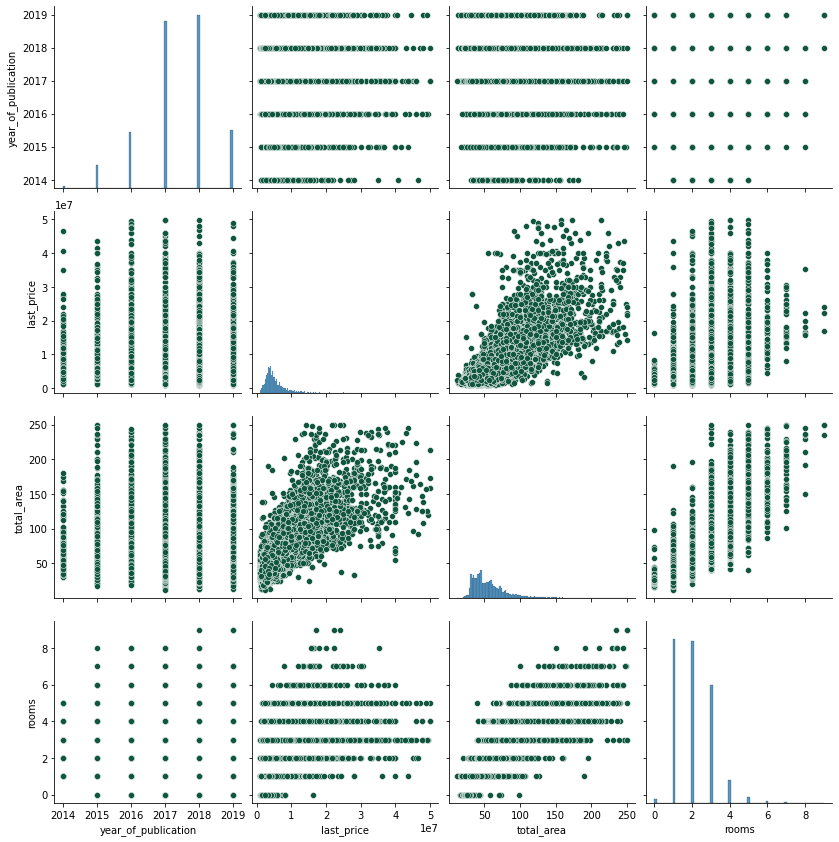

In [52]:
sns.pairplot(data[['year_of_publication','last_price', 'total_area', 'rooms']], 
             plot_kws={'color': '#10563E'})

plt.gcf().set_size_inches(12, 12)

plt.show()


Самая низкая цена квартиры зафиксирована в 2016 году. С 2014 года цены снизились. На это могло повлиять уменьшние средней площадь квартир и увеличение числа обьявлений, с 2018 года цены на квартиры растут, средняя площадь растет и снижается предложение(уменьшается количетсво обьявления). 

In [53]:
data.pivot_table(index = 'year_of_publication',
                 values = ['total_area','rooms','last_price'],
                 aggfunc = ['mean']).round()


mean                 
                    last_price rooms total_area
year_of_publication                            
2014                 9485846.0   2.0       78.0
2015                 6851713.0   2.0       67.0
2016                 6067744.0   2.0       60.0
2017                 5856493.0   2.0       59.0
2018                 5720649.0   2.0       57.0
2019                 6277959.0   2.0       58.0

**Вывод**  
  
На стоимость квартиры больше всего влияет общая и жилая площадь,количество комнат и этаж квартиры. Самая низкая стоимость у квартир на первом и последнем этаже. Чем больше комнат, чем выше цена квартиры. 
От даты публикации объявления также зависит стоимость, самые дешевые квартиры продаются в июне, самые дорогие в апреле.  
Самая низкая цена квартиры зафиксирована в 2016 году. С 2014 года цены снизились. На это могло повлиять уменьшение средней площади квартир и увеличение числа обьявлений, с 2018 года цены на квартиры растут, растет средняя площадь растет и снижается предложение 


### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.  ###


,count,mean
locality_name,,
Санкт-Петербург,15350,111997.0
Мурино,584,85973.0
поселок Шушары,439,78551.0
Всеволожск,394,68735.0
Пушкин,359,102827.0
Колпино,336,75352.0
поселок Парголово,326,90205.0
Гатчина,306,68935.0
деревня Кудрово,299,92474.0


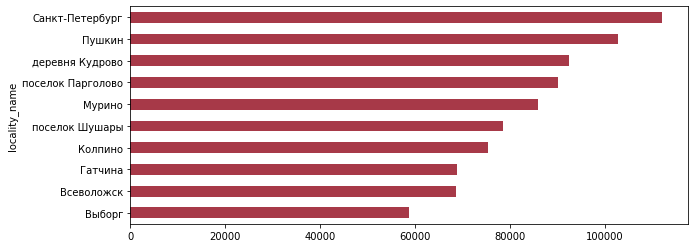

In [54]:
#делаем сводную таблицу
locality_pivot_table = data.pivot_table(index = 'locality_name',\
                                        values = 'square_meter_price',\
                                        aggfunc=['count','mean'])
locality_pivot_table.columns = ['count','mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).round().head(10)

#вычисляем города с самой высокой и низкой стоимостью м2
mean_pivot = locality_pivot_table.head(10)
mean_pivot['mean'].mean()
locality_pivot_table['mean'].sort_values(ascending = True)\
                            .plot(kind = 'barh',figsize = (10,4),color = '#A73948')


locality_pivot_table

**Вывод**  
  
Средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений - 83831 руб.    
Самая высокая стоимость м² в городе Санкт-Петербург. Самая низкая в г. Выборг.

### Как стоимость объектов зависит от расстояния до центра города (на примере Санкт-Петербурга). ###

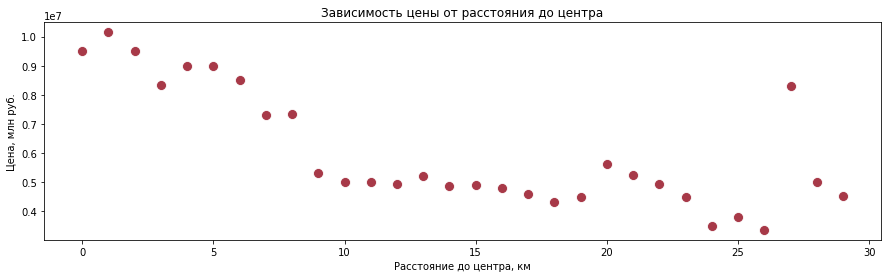

In [55]:
#заменим пустые значения столбца на 1111111

data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1111111)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

#фильтруем данные, строим график
pivot_table_km = data.query('locality_name == "Санкт-Петербург"and cityCenters_nearest_km !=1111111')\
                            .pivot_table(index = 'cityCenters_nearest_km',
                            values = 'last_price', aggfunc = 'median')

plt.figure(figsize=(15, 4))
sns.scatterplot(data=pivot_table_km, x='cityCenters_nearest_km', y='last_price',s = 100,color = '#A73948')
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена, млн руб.')
plt.show()


In [56]:
data = data.sort_values('cityCenters_nearest_km')
d = data
d = d.loc[d ['cityCenters_nearest_km'] == 27]
d.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_publication,month_of_publication,year_of_publication,cityCenters_nearest_km
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,97.000000,100.00000,100.000000,100.00000,...,100.000000,68.000000,100.000000,70.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.0
mean,9.060000,5.823766e+06,54.358800,1.950000,2.683200,6.400000,32.307938,3.89000,8.591100,0.52000,...,0.820000,399.523135,0.730000,468.933128,391.07000,101690.348684,2.620000,6.580000,2017.320000,27.0
std,5.541068,4.661854e+06,28.155667,0.936089,0.225948,4.264014,17.489420,3.08432,5.472379,1.11446,...,1.113553,194.794734,1.254125,150.668934,593.58206,30763.542528,1.895129,3.832819,0.993718,0.0
min,0.000000,1.980000e+06,27.000000,0.000000,2.500000,2.000000,14.000000,1.00000,5.000000,0.00000,...,0.000000,20.000000,0.000000,153.000000,3.00000,63342.318059,0.000000,1.000000,2014.000000,27.0
25%,5.000000,3.387500e+06,34.325000,1.000000,2.500000,4.000000,18.000000,2.00000,5.500000,0.00000,...,0.000000,308.000000,0.000000,482.988701,62.25000,76891.654098,1.000000,3.000000,2017.000000,27.0
50%,9.000000,4.245000e+06,50.000000,2.000000,2.650000,5.000000,30.000000,3.00000,7.000000,0.00000,...,0.000000,404.297170,0.000000,482.988701,157.00000,96313.405797,3.000000,7.000000,2017.000000,27.0
75%,12.000000,6.387500e+06,63.700000,3.000000,2.650000,9.000000,40.000000,5.00000,9.100000,1.00000,...,1.000000,431.750000,1.000000,482.988701,358.75000,115323.839628,4.000000,10.000000,2018.000000,27.0
max,23.000000,2.950000e+07,228.000000,4.000000,3.500000,24.000000,141.000000,17.00000,40.400000,5.00000,...,3.000000,1496.000000,3.000000,986.000000,2269.00000,256521.739130,6.000000,12.000000,2019.000000,27.0


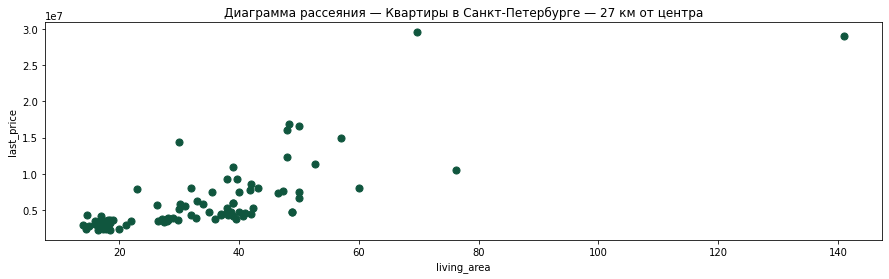

In [57]:
d.plot(kind='scatter', y='last_price', x='living_area', alpha=1, figsize=(15,4), c='#10563E', s=50)
plt.title('Диаграмма рассеяния — Квартиры в Санкт-Петербурге — 27 км от центра')
plt.show()


На 27 км есть обьекты с площадью до 145 м2 квадратов и высокой ценой. Это может обьяснить выброс.

In [58]:
new_data = data
new_data = new_data.loc[new_data ['locality_name'] == 'Санкт-Петербург']
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] >= 3 )]

piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')

piter_pivot.style.set_caption('Квартиры в 3 км от центра Санкт-Петербурга')

,cityCenters_nearest_km
floor_category,
другой,11607
первый,1503
последний,1706


In [59]:
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] <= 4)]
piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
piter_pivot.style.set_caption('Квартиры в 4 км от центра Санкт-Петербурга')

,cityCenters_nearest_km
floor_category,
другой,681
первый,131
последний,187


In [60]:
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] <= 5)]
piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
piter_pivot.style.set_caption('Квартиры в 5 км от центра Санкт-Петербурга')

,cityCenters_nearest_km
floor_category,
другой,681
первый,131
последний,187


In [61]:
new_data = data
new_data = new_data.loc[new_data['locality_name'] == 'Санкт-Петербург']
new_data = new_data.loc[new_data['cityCenters_nearest_km'] == 3]

piter_pivot = new_data.pivot_table(index='floor_category', values='cityCenters_nearest_km', aggfunc='count')

piter_pivot.style.set_caption('Квартиры в 3 км от центра Санкт-Петербурга')


,cityCenters_nearest_km
floor_category,
другой,207
первый,54
последний,77


In [62]:
new_data = data
new_data = new_data.loc[new_data ['locality_name'] == 'Санкт-Петербург']
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] == 5)]
piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
print('Квартиры в 5 км от центра Санкт-Петербурга')
piter_pivot

Квартиры в 5 км от центра Санкт-Петербурга


,cityCenters_nearest_km
floor_category,
другой,655
первый,79
последний,132


**Вывод**  
  
Чем ближе дом расположен к центру, тем выше стоимость квадратного метра. Стоимость квадратного метра заметнее меняется при удалении от центра от 1 до 10 км. При покупке квартиры в 10 - 25 км удаленности от центра, выгоднее покупать квартиру ближе к центру, так как стоимость м² у квартир в этих районах повышается незначительно.  
Но есть исключения, на расстоянии 27 км от центра есть дорогое жилье большого метража. 

Большинство продающихся квартир на расстоянии от центра 3-5 км находятся не на первом или последнем этаже
В 3 км от центра 80% продаваемых квартир находятся не на первом или последнем этаже.Такие квартиры стоят дороже, они могут создавать пик на графике. В 3 км продается больше квартир, чем в 4 или 5 км от центра.
В 5 км от центра 71% продаваемых квартир находятся не на первом или последнем этаже. В 5 км продается меньше недвижимости, чем ближе к центру(в 3 км от центра)


### Общий вывод

Мы провели исследование рынка недвижимости в Санкт-Петербурге на основе датасета Яндекс.Недвижимости. Датасет содержит обьявления о продаже квартир с 2014 до 2019 годы.  
Мы изучили общую информацию датасета,провели предобработку данных, добавили в датасет новые столбцы, необходимые для расчетов, изучили связь стоимости квадратного метра с другими параметрами жилья.  

В ходе предобработке очистили данные от аномальных значений (восстановили пропущенные значения или удалили данные), заполнили пропущенные значения там, где это возможно, изменили тип данных, устранили неявные дубликаты. Обосновали все шаги предобработки данных.  
Потеря данных после предобработки составила 4%.   

**Результаты исследования**

1. Средняя площадь квартиры, выставленной на продажу - 60 м². Чаще всего продают двухкомнатных квартиры. Больше всего объявлений о продажаж квартир на 4-ом этаже 8-ми этажного дома. Меньше всего квартир продается на первых и последних этажах. 

2. Среднее время продажи квартиры в данном регионе - полгода. Максимальный срок продажи квартиры - 1580 дня, минимальный - 1 день. Среднее значение - 179 дней.

3. На стоимость квадратного метра квартиры больше всего влияет общая и жилая площадь, количество комнат и этаж квартиры. Самая низкая стоимость у квартир на первом и последнем этажах.

4. От даты публикации объявления также зависит стоимость, так как рынку недвижимости присуща сезонность. Самая высокая стоимость в апреле. Самая низкая стоимость обнаружена в объявлениях, опубликованных в июне. Летом, в сезон отпусков, спрос покупку жилья снижается.

5. По сравнению с 2014 годом цены на квартиры к 2016 году упали на 10%, это может быть связано с снижением средней площади квартир. С 2016 года цены на квартиры начинают растут, и немного повышается средняя площадь.  
  
6. В Санкт-Петербурге стоимость квадратного метра (помимо вышеперечисленных параметров) зависит от удаленности от центра. Чем ближе дом расположен к центру, тем выше стоимость квадратного метра. Стоимость квадратного метра заметно меняется при удалении от центра от 1 до 10 км. Однако, квартиры, находящиеся в удалении от центра в 10-25 км, незначительно отличаются по цене. Но есть исключения - недвижимость большого метража(от 100 м2), удаленная от центра.
  